In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize
import time
import datetime as dt
import glob
import seaborn as sns
from colour import Color
import folium
from folium import plugins
from itertools import cycle, islice

In [2]:
def all_csv_df():
    '''
    Loops through the .csv in /raw and concatonates them into 1 Dataframe
    '''
    path = r'/Users/AaronLee/Documents/GalvanizeDSI/UnsplashEDA/raw'
    all_files = glob.glob(path + "/*.csv")

    list_holder = []

    for filename in all_files:
        df = pd.read_csv(filename, index_col=None, header=0)
        list_holder.append(df)

    US_df = pd.concat(list_holder, axis=0, ignore_index=True)
    return US_df

In [3]:
full_df = all_csv_df()
Unsplash_df = full_df.drop_duplicates('id')
Unsplash_df = Unsplash_df[['id', 'user.username', 'created_at', 'views', 'likes', 'downloads', 'exif.make', 'exif.aperture', 'location.country', 'user.total_photos', 'user.total_collections', 'user.instagram_username', 'user.twitter_username', 'color']]
Unsplash_df['dl_percent'] = (Unsplash_df['downloads'] / Unsplash_df['views']) * 100
Unsplash_df['like_percent'] = (Unsplash_df['likes'] / Unsplash_df['views']) * 100
Unsplash_df.head()

,id,user.username,created_at,views,likes,downloads,exif.make,exif.aperture,location.country,user.total_photos,user.total_collections,user.instagram_username,user.twitter_username,color,dl_percent,like_percent
0,orVg0K35hlw,anitaaustvika,2019-08-11T02:16:27-04:00,714716,118,1460,NIKON CORPORATION,2.8,NaN,336,0,rareflower_photography,NaN,#26150A,0.204277,0.016510
1,xvPXJy2su0g,schluditsch,2019-08-18T20:46:07-04:00,301662,29,567,Canon,4.5,NaN,32,9,schluditsch,NaN,#201D1A,0.187959,0.009613
2,QS-19iV-uC4,janellesoto_,2019-08-27T05:47:45-04:00,280267,66,1175,SONY,7.1,NaN,23,0,janellesoto_,NaN,#553E42,0.419243,0.023549
3,vP7gLpFYyq4,elijahsad,2019-08-06T05:46:58-04:00,525334,56,1309,SONY,1.8,NaN,97,0,elijah_tmn,Elijah_sad,#E9E7EC,0.249175,0.010660
4,wzEGhQJOEbA,mrthetrain,2019-08-22T16:15:50-04:00,219458,6,426,Canon,1.8,NaN,349,62,mr_theTrain,mrtheTrain,#E6E8D6,0.194115,0.002734


In [4]:
len(full_df['id'].unique())

1951

In [ ]:
# full_df.describe()

In [ ]:
# for col in full_df.columns: 
#     print(col) 

# Does Camera Model make a Difference?

In [ ]:
Unsplash_df['exif.make'].value_counts()

### Breakdown of Camera usage (Top 5)

In [ ]:
# pie chart of workers
labels = ['Canon', 'SONY', 'NIKON CORPORATION', 'FUJIFILM', 'Apple', 'Other']
sizes = [Unsplash_df['exif.make'].value_counts()[0],
         Unsplash_df['exif.make'].value_counts()[1],
         Unsplash_df['exif.make'].value_counts()[2],
         Unsplash_df['exif.make'].value_counts()[3],
         Unsplash_df['exif.make'].value_counts()[4],
         sum(Unsplash_df['exif.make'].value_counts()[5:])
        ]

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.title('Brand Breakdown', fontsize=20)
plt.show()

In [ ]:
model_df = Unsplash_df.groupby(['exif.make']).mean()

In [ ]:
target_model = model_df.loc[['Canon', 'SONY', 'NIKON CORPORATION', 'FUJIFILM', 'Apple']].sort_index(ascending=False).reset_index()

In [ ]:
target_model

In [ ]:
sns.catplot(x='exif.make', y='views', data=target_model, kind='bar', height=7)
plt.title('Camera Model Average Views', fontsize=20);

In [ ]:
sns.catplot(x='exif.make', y='likes', data=target_model, kind='bar', height=7)
plt.title('Camera Model Average Views', fontsize=20);

In [ ]:
sns.catplot(x='exif.make', y='downloads', data=target_model, kind='bar', height=7)
plt.title('Camera Model Average Views', fontsize=20);

# Is More Total Photos Correlated with more Engagment?

In [ ]:
user_group = Unsplash_df.groupby(['user.username'])

In [ ]:
user_group.first()

In [ ]:
x = Unsplash_df['user.total_photos'].tolist()
y_view = Unsplash_df['views'].tolist()

plt.scatter(x, y_view, alpha=0.2)
plt.title('Total Photo to Views', fontsize=20)
plt.xlabel('User Total Photos', fontsize=20)
plt.ylabel('Views', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 2000)
plt.ylim(0, 1500000);

In [ ]:
x = Unsplash_df['user.total_photos'].tolist()
y_likes = Unsplash_df['likes'].tolist()

plt.scatter(x, y_likes, alpha=0.2)
plt.title('Total Photo to Likes', fontsize=20)
plt.xlabel('User Total Photos', fontsize=20)
plt.ylabel('Likes', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 2000);
# plt.ylim(0, 1500000);

In [ ]:
x = Unsplash_df['user.total_photos'].tolist()
y_dl = Unsplash_df['downloads'].tolist()

plt.scatter(x, y_dl, alpha=0.2)
plt.title('Total Photo to Downloads', fontsize=20)
plt.xlabel('User Total Photos', fontsize=20)
plt.ylabel('Downloads', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 2000);
# plt.ylim(0, 1500000);

# Aperture Comparison

In [ ]:
x1 = Unsplash_df['exif.aperture'].tolist()

plt.scatter(x1, y_view, alpha=0.2)
plt.title('Aperture to Views', fontsize=20)
plt.xlabel('User Total Photos', fontsize=20)
plt.ylabel('Views', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 17)
plt.ylim(0, 1500000);

In [ ]:
x1 = Unsplash_df['exif.aperture'].tolist()

plt.scatter(x1, y_likes, alpha=0.2)
plt.title('Aperture to Likes', fontsize=20)
plt.xlabel('User Total Photos', fontsize=20)
plt.ylabel('Likes', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 17);

In [ ]:
x1 = Unsplash_df['exif.aperture'].tolist()

plt.scatter(x1, y_dl, alpha=0.2)
plt.title('Aperture to Downloads', fontsize=20)
plt.xlabel('User Total Photos', fontsize=20)
plt.ylabel('Downloads', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 17);

# Location Relevance

In [ ]:
loc_group = Unsplash_df.groupby(['location.country'])

In [ ]:
loc_group.mean()

# Hex --> RBG

In [ ]:
# Unsplash_df['color'].value_counts()

In [5]:
#Appending colors to a singular list

color_list = Unsplash_df['color'].tolist()
rgb_list = []

for i in color_list:
    h = i.lstrip('#')
    rgb_list.append(tuple(int(h[i:i+2], 16) for i in (0, 2, 4)))

# rgb_list

In [6]:
#Splitting into 3 categories

red = []
green = []
blue = []

for i in rgb_list:
    red.append(i[0])
    
for i in rgb_list:
    green.append(i[1])

for i in rgb_list:
    blue.append(i[2])
    
# Making new columns to dataframe
Unsplash_df['rgb'] = rgb_list
Unsplash_df['red'] = red
Unsplash_df['green'] = green
Unsplash_df['blue'] = blue

In [ ]:
'''
red_plot = Unsplash_df['red'].value_counts().plot(kind='hist', bins=30, alpha=0.4)
green_plot = Unsplash_df['green'].value_counts().plot(kind='hist', bins=30, alpha=0.4)
blue_plot = Unsplash_df['blue'].value_counts().plot(kind='hist', bins=30, alpha=0.4);
'''

## Distribution Based on Color

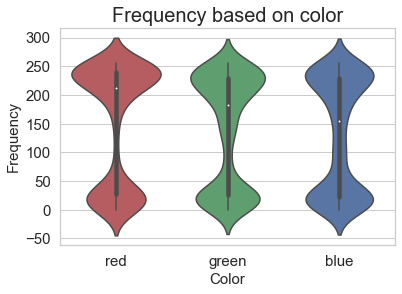

In [7]:
sns.set(style='whitegrid')
my_pal = {"red": "r", "green": "g", "blue":"b"}
sns.violinplot(data=Unsplash_df[['red', 'green', 'blue']], palette=my_pal)
plt.title('Frequency based on color', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Color', fontsize=15)
plt.ylabel('Frequency', fontsize=15);

In [ ]:
Unsplash_df.describe()
# r = 151
# g = 140
# b = 130

### Seperation values function for each color

In [8]:
#Categorizes color in a binary way

bin_list = []

for i in rgb_list:
    if i[0] > 151 and i[1] < 140 and i[2] < 130:
        bin_list.append('red')
    elif i[0] > 151 and i[1] < 140 and i[2] > 130:
        bin_list.append('magenta')
    elif i[0] > 151 and i[1] > 140 and i[2] < 130:
        bin_list.append('yellow')
    elif i[0] > 151 and i[1] > 140 and i[2] > 130:
        bin_list.append('white')
    elif i[0] < 151 and i[1] > 140 and i[2] > 130:
        bin_list.append('cyan')
    elif i[0] < 151 and i[1] > 140 and i[2] < 130:
        bin_list.append('lime')
    elif i[0] < 151 and i[1] < 140 and i[2] > 130:
        bin_list.append('blue')
    else:
        bin_list.append('black')

# bin_list

In [9]:
#Makes new column with seperated color
Unsplash_df['main_color'] = bin_list

In [10]:
#Create average color from RGB values
Unsplash_df_list = ((Unsplash_df['red'] + Unsplash_df['green'] + Unsplash_df['blue']) // 3).tolist()
Unsplash_df['avg_colors'] = Unsplash_df_list

In [11]:
Unsplash_df.groupby('main_color').count()

,id,user.username,created_at,views,likes,downloads,exif.make,exif.aperture,location.country,user.total_photos,...,user.instagram_username,user.twitter_username,color,dl_percent,like_percent,rgb,red,green,blue,avg_colors
main_color,,,,,,,,,,,,,,,,,,,,,
black,722,722,722,722,722,722,651,623,139,722,...,664,271,722,722,722,722,722,722,722,722
blue,23,23,23,23,23,23,20,19,6,23,...,19,11,23,23,23,23,23,23,23,23
cyan,27,27,27,27,27,27,26,26,9,27,...,25,12,27,27,27,27,27,27,27,27
magenta,6,6,6,6,6,6,6,6,0,6,...,4,3,6,6,6,6,6,6,6,6
red,81,81,81,81,81,81,69,67,17,81,...,74,40,81,81,81,81,81,81,81,81
white,967,967,967,967,967,967,892,859,195,967,...,879,381,967,967,967,967,967,967,967,967
yellow,125,125,125,125,125,125,116,113,29,125,...,114,51,125,125,125,125,125,125,125,125


# Color(est) Photos Analysis

#### White(est)

In [12]:
#Make Dataframe for just only white
white_df = Unsplash_df[Unsplash_df['main_color'] == 'white']
white_df.sort_values(['avg_colors', 'dl_percent'], ascending=False)

,id,user.username,created_at,views,likes,downloads,exif.make,exif.aperture,location.country,user.total_photos,...,user.twitter_username,color,dl_percent,like_percent,rgb,red,green,blue,main_color,avg_colors
1136,8RN9NPDwWgE,pavelanoshin,2019-08-17T21:59:56-04:00,346764,17,917,Canon,1.8,NaN,89,...,pavelanoshin,#FFFFFF,0.264445,0.004902,"(255, 255, 255)",255,255,255,white,255
87,K8lQfACC8WE,wx1993,2019-09-01T22:03:09-04:00,72114,18,190,Canon,4.0,NaN,847,...,NaN,#FFFFFF,0.263472,0.024960,"(255, 255, 255)",255,255,255,white,255
2127,89JjCbf_NvA,steve3p_0,2019-08-11T16:15:23-04:00,808769,130,2043,GoPro,2.8,NaN,608,...,NaN,#FFFFFF,0.252606,0.016074,"(255, 255, 255)",255,255,255,white,255
3151,BsS0gMB1kBU,itsbluestudio,2019-08-12T05:31:37-04:00,409081,19,1029,FUJIFILM,8.0,NaN,223,...,itsBlueStudio,#FFFFFF,0.251539,0.004645,"(255, 255, 255)",255,255,255,white,255
561,nIvrzJPFC-Y,judebeck,2019-08-21T01:59:50-04:00,323534,17,714,NIKON CORPORATION,2.2,NaN,71,...,NaN,#FFFFFF,0.220688,0.005254,"(255, 255, 255)",255,255,255,white,255
268,lZXHJulIF1M,mitsuo_z,2019-08-17T23:41:50-04:00,316079,4,650,Canon,5.6,NaN,165,...,NaN,#FFFFFF,0.205645,0.001266,"(255, 255, 255)",255,255,255,white,255
1034,FpPpqiu2n7I,heyitsadamk,2019-08-22T16:38:43-04:00,352221,41,710,NIKON CORPORATION,2.2,United States,2,...,NaN,#FFFFFF,0.201578,0.011640,"(255, 255, 255)",255,255,255,white,255
3092,jyxwORL3TzI,niclasmoser,2019-09-05T02:16:56-04:00,162980,25,324,Canon,2.8,NaN,26,...,NaN,#FFFFFF,0.198797,0.015339,"(255, 255, 255)",255,255,255,white,255
176,VGtEGMBA-PU,marcuschen1,2019-08-14T02:46:58-04:00,335345,24,613,FUJIFILM,1.0,NaN,60,...,NaN,#FFFFFF,0.182797,0.007157,"(255, 255, 255)",255,255,255,white,255
181,dtd8jCYstsM,jeremybishop,2019-09-02T01:55:45-04:00,414638,51,712,SONY,8.0,NaN,809,...,NaN,#FFFFFF,0.171716,0.012300,"(255, 255, 255)",255,255,255,white,255


#### Black(est)

In [13]:
black_df = Unsplash_df[Unsplash_df['main_color'] == 'black']
black_df.sort_values(['avg_colors', 'dl_percent'])

,id,user.username,created_at,views,likes,downloads,exif.make,exif.aperture,location.country,user.total_photos,...,user.twitter_username,color,dl_percent,like_percent,rgb,red,green,blue,main_color,avg_colors
507,2iVAE0914hs,marcuschen1,2019-08-12T11:01:03-04:00,423992,11,468,FUJIFILM,1.0,NaN,60,...,NaN,#000100,0.110379,0.002594,"(0, 1, 0)",0,1,0,black,0
2932,CygFgxHqfSI,anniespratt,2019-08-12T04:20:19-04:00,461071,15,597,NaN,NaN,NaN,6625,...,anniespratt,#000000,0.129481,0.003253,"(0, 0, 0)",0,0,0,black,0
397,j6Y4lyBFVdc,ussi,2019-08-10T16:14:59-04:00,1770397,56,2593,Canon,4.5,United States,80,...,NaN,#000000,0.146464,0.003163,"(0, 0, 0)",0,0,0,black,0
3359,89xx7Icy38M,raspopovamarisha,2019-08-23T14:00:02-04:00,266366,19,469,NIKON CORPORATION,NaN,NaN,59,...,NaN,#000000,0.176074,0.007133,"(0, 0, 0)",0,0,0,black,0
1118,aoqXcvxI9NU,mreizberg,2019-08-09T13:35:40-04:00,689364,40,1359,NaN,NaN,Lithuania,6,...,NaN,#000000,0.197138,0.005802,"(0, 0, 0)",0,0,0,black,0
2135,Yzqq5YssljQ,mreizberg,2019-08-09T13:35:39-04:00,783468,128,1608,NaN,NaN,Lithuania,6,...,NaN,#000000,0.205241,0.016338,"(0, 0, 0)",0,0,0,black,0
237,j8QdjggaCPA,hadleyjin_,2019-08-18T22:18:16-04:00,330993,17,754,Canon,6.3,NaN,128,...,HadleyJin,#000000,0.227799,0.005136,"(0, 0, 0)",0,0,0,black,0
111,15mkCCDr9iY,karljkhedin,2019-09-03T07:47:35-04:00,191552,43,568,NaN,NaN,NaN,104,...,NaN,#000001,0.296525,0.022448,"(0, 0, 1)",0,0,1,black,0
433,fRqMGHKRDl8,drew_beamer,2019-09-01T12:45:20-04:00,153869,27,588,Canon,4.5,NaN,104,...,beamomatic9000,#000000,0.382143,0.017547,"(0, 0, 0)",0,0,0,black,0
525,VneWikA0NUI,ninjason,2019-09-03T22:05:43-04:00,119263,66,529,Canon,2.8,NaN,1557,...,NaN,#000000,0.443558,0.055340,"(0, 0, 0)",0,0,0,black,0


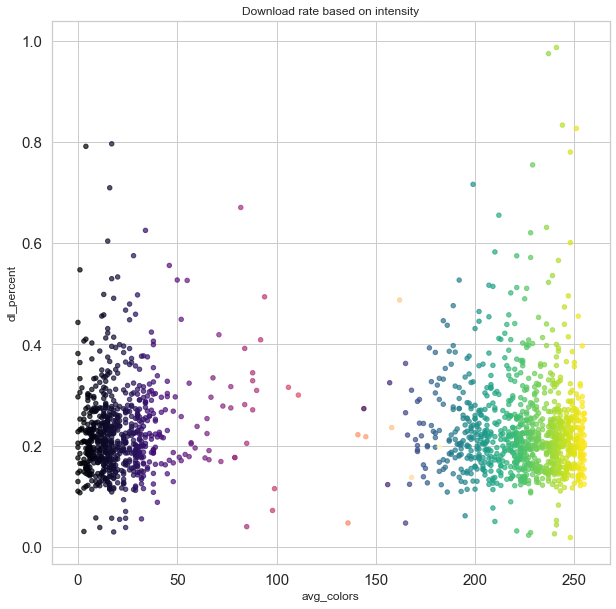

In [23]:
#White_mean = 0.231
#Black_mean = 0.230
ax = white_df.plot.scatter(x='avg_colors', y='dl_percent', c='avg_colors', colorbar = False, colormap='viridis', alpha=0.7, title='Download rate based on intensity', figsize= (10, 10), fontsize=15)
black_df.plot.scatter(x='avg_colors', y='dl_percent', c='avg_colors', colorbar = False, colormap='magma', alpha=0.7, ax=ax);

# Best 'Engagement'

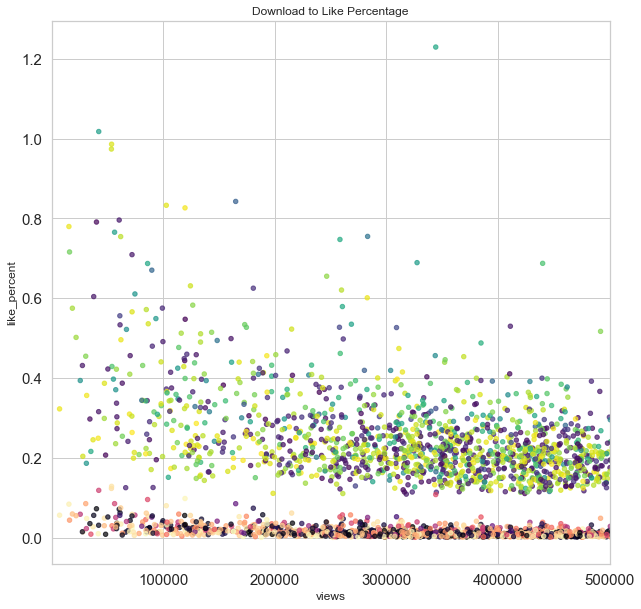

In [30]:
#dl_percent = 0.236552
#like_percent = 0.012917
ax = Unsplash_df.plot.scatter(x='views', y='dl_percent', c='avg_colors', colorbar = False, colormap='viridis', alpha=0.7, title='Download to Like Percentage', figsize= (10, 10), fontsize=15)
Unsplash_df.plot.scatter(x='views', y='like_percent', c='avg_colors', colorbar = False, colormap='magma', alpha=0.7, ax=ax)
plt.xlim(9, 500000);

In [26]:
Unsplash_df.mean()

views                     497732.208098
likes                         46.629933
downloads                    944.729882
exif.aperture                  4.244425
user.total_photos            250.547412
user.total_collections         5.378268
dl_percent                     0.236552
like_percent                   0.012917
red                          150.846233
green                        139.801640
blue                         131.052281
avg_colors                   140.236802
dtype: float64

In [ ]:
Unsplash_df['main_color'].value_counts()

In [ ]:
my_colors = list(islice(cycle(['w', 'black', 'y', 'r', 'c', 'blue', 'm']), None, len(Unsplash_df)))
Unsplash_df['main_color'].value_counts().plot.bar(color=my_colors, edgecolor= 'black', linewidth=1.2)
plt.title('Main Colors in Photos', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Color', fontsize=15)
plt.ylabel('Frequency', fontsize=15);

In [ ]:
canon = Unsplash_df[Unsplash_df['exif.make'] == 'Canon'].groupby('main_color')
nikon = Unsplash_df[Unsplash_df['exif.make'] == 'NIKON CORPORATION'].groupby('main_color')
sony = Unsplash_df[Unsplash_df['exif.make'] == 'SONY'].groupby('main_color')
fujifilm = Unsplash_df[Unsplash_df['exif.make'] == 'FUJIFILM'].groupby('main_color')
apple = Unsplash_df[Unsplash_df['exif.make'] == 'Apple'].groupby('main_color')

In [ ]:
canon_dict = canon['main_color'].count().to_dict()
nikon_dict = nikon['main_color'].count().to_dict()
sony_dict = sony['main_color'].count().to_dict()
fujifilm_dict = fujifilm['main_color'].count().to_dict()
apple_dict = apple['main_color'].count().to_dict()

In [ ]:
labels = ['White', 'Black', 'Yellow', 'Red', 'Cyan', 'Blue', 'Magenta']
sizes = [canon_dict['white'],
         canon_dict['black'],
         canon_dict['yellow'],
         canon_dict['red'],
         canon_dict['cyan'],
         canon_dict['blue'], 
         canon_dict['magenta']
        ]

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.title('Brand Breakdown', fontsize=20)
plt.legend()
plt.show()

In [ ]:
sony_dict

In [ ]:
X = np.arange(len(canon_dict))
ax = plt.subplot(111)
ax.bar(X, canon_dict.values(), width=0.2, color='b', align='center')
ax.bar(X-0.2, nikon_dict.values(), width=0.2, color='g', align='center')
# ax.bar(X-0.4, sony_dict.values(), width=0.2, color='y', align='center')
# ax.bar(X-0.6, fujifilm_dict.values(), width=0.2, color='m', align='center')
# ax.bar(X-0.8, apple_dict.values(), width=0.2, color='c', align='center')
# ax.legend(('Canon','Nikon'))
plt.xticks(X, canon_dict.keys())
plt.title("Color Comparison", fontsize=17)
plt.show()

In [ ]:
plt.bar(canon_dict.keys(), canon_dict.values())

In [ ]:
Unsplash_df[['exif.make', 'main_color']].dropna()

# Holistic Multi Plots

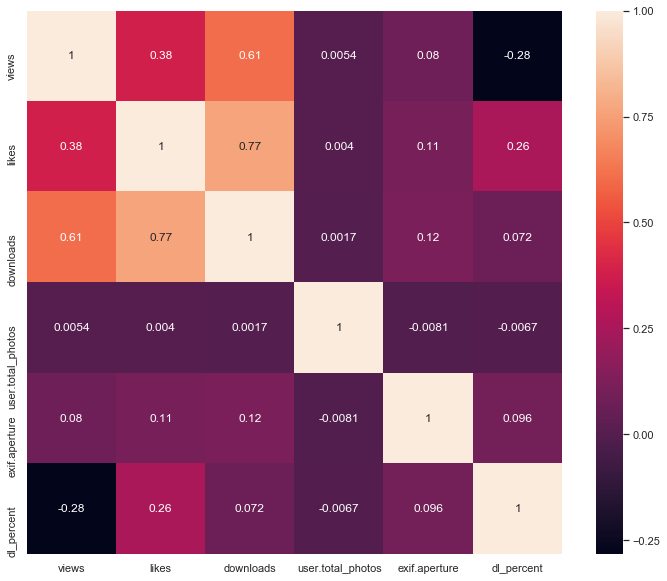

In [28]:
plt.subplots(1, figsize=(12,10))
sns.heatmap(Unsplash_df[['views', 'likes', 'downloads', 'user.total_photos', 'exif.aperture', 'dl_percent']].corr(), annot=True);

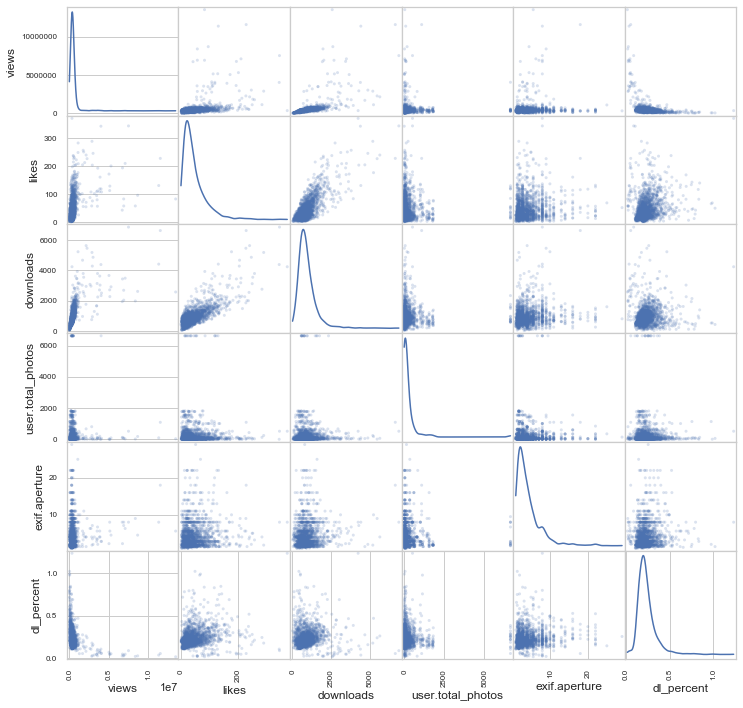

In [29]:
pd.plotting.scatter_matrix(Unsplash_df[['views', 'likes', 'downloads', 'user.total_photos', 'exif.aperture', 'dl_percent']].applymap(lambda x:x*1), alpha=0.2, figsize=(12,12), diagonal='kde');

# Mapping Lat and Long

In [ ]:
map_df = full_df[['user.username', 'location.position.latitude', 'location.position.longitude']].dropna()
map_df

In [ ]:
m = folium.Map([46.196358, 6.473567], zoom_start=11)
m

In [ ]:
for index, row in map_df.iterrows():
    folium.CircleMarker([row['location.position.latitude'], row['location.position.longitude']],
                        radius=15,
                        popup=row['user.username'],
                        fill_color="#3db7e4", # divvy color
                       ).add_to(m)

In [ ]:
stationArr = map_df[['location.position.latitude', 'location.position.longitude']].as_matrix()
m.add_children(plugins.HeatMap(stationArr, radius=15))
m